In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/files/infolimpioavanzadoTarget.csv")
df.head()

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0


In [ ]:
# data understanding
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Columns: 1285 entries, date to TARGET
dtypes: float64(1280), int64(3), object(2)
memory usage: 76.3+ MB
None
              open         high          low        close     adjclose  \
count  7781.000000  7781.000000  7781.000000  7781.000000  7781.000000   
mean     34.990220    35.655999    34.301243    34.964414    34.483147   
std      99.841502   101.451058    98.073945    99.790823    98.603879   
min       0.410000     0.435000     0.405000     0.408000     0.408000   
25%       4.050000     4.130000     3.980000     4.030000     3.960000   
50%      10.080000    10.110000    10.005000    10.080000    10.061000   
75%      24.350000    24.500000    24.080000    24.250000    22.466007   
max     795.739990   799.359985   784.960022   797.489990   783.376221   

             volume  RSIadjclose15  RSIvolume15  RSIadjclose25  RSIvolume25  \
count  7.781000e+03    7316.000000  7316.000000    7006.000000  7006.00

In [ ]:
from scipy.stats import zscore

print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Feature engineering
# Log transformation of volume
df['log_volume'] = np.log(df['volume'] + 1)

# Percentage change in closing price
df['pct_change'] = df['close'].pct_change()

# Drop rows with NaN values created by pct_change()
df.dropna(inplace=True)

# Handle outliers using z-score
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = np.where(np.abs(zscore(df[col])) > 3, df[col].median(), df[col])

# Print the shape of the DataFrame
print(df.shape)

date                  0
open                  0
high                  0
low                   0
close                 0
                   ... 
stochastic-kd-15    587
volumenrelativo     215
diff                155
INCREMENTO          155
TARGET                0
Length: 1285, dtype: int64
(4203, 1287)


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [ ]:
df.isnull().sum()

date          0
open          0
high          0
low           0
close         0
             ..
diff          0
INCREMENTO    0
TARGET        0
log_volume    0
pct_change    0
Length: 1287, dtype: int64

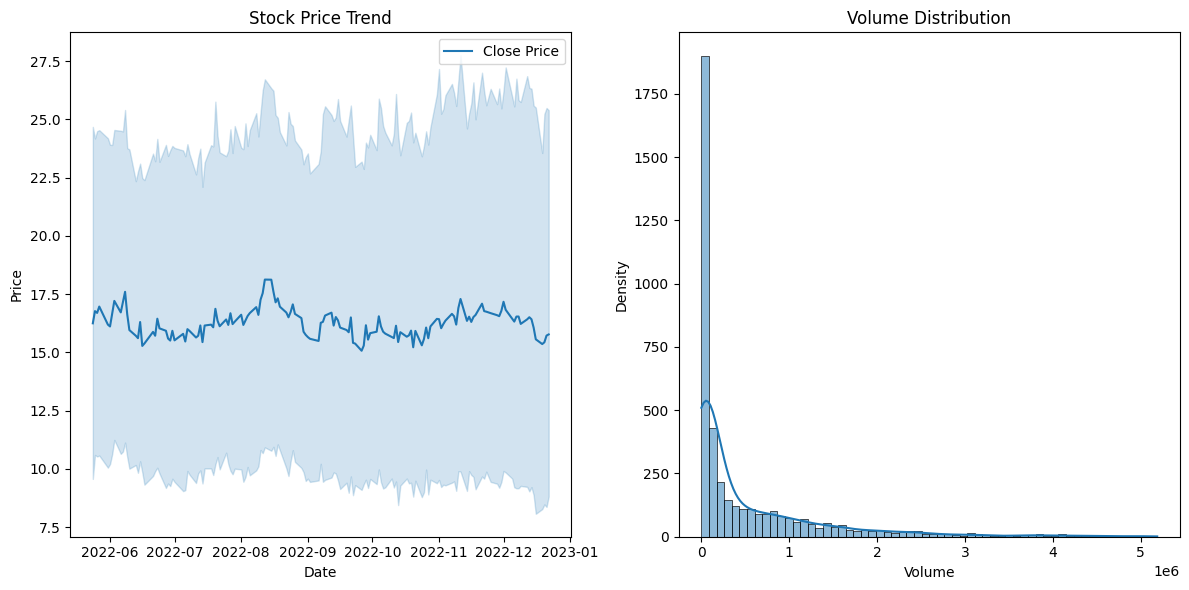

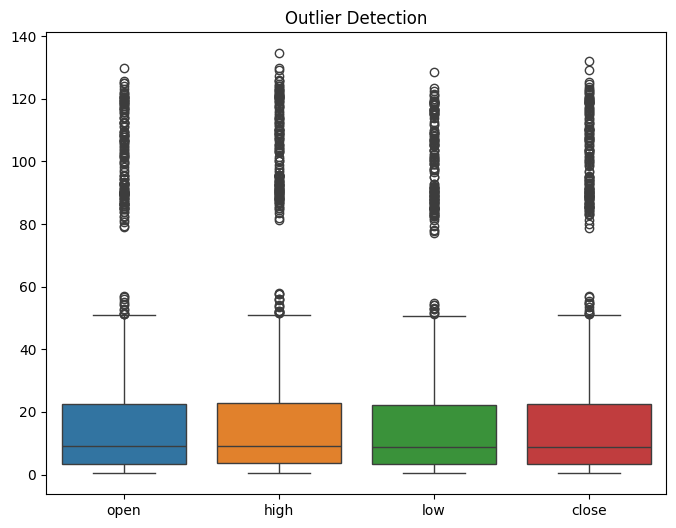

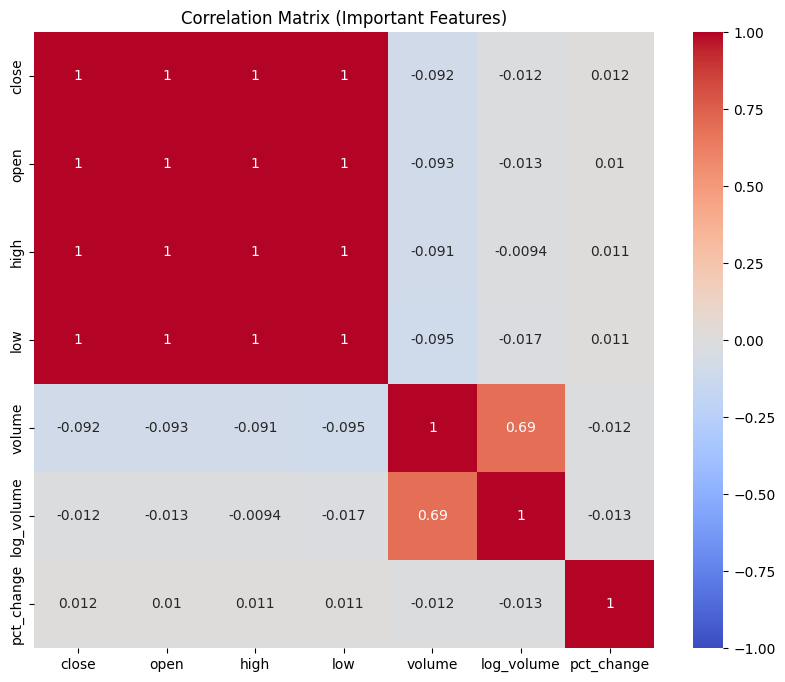

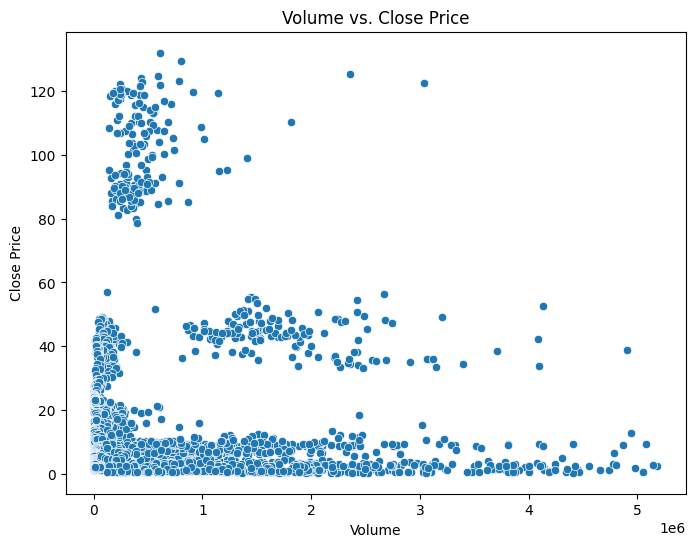

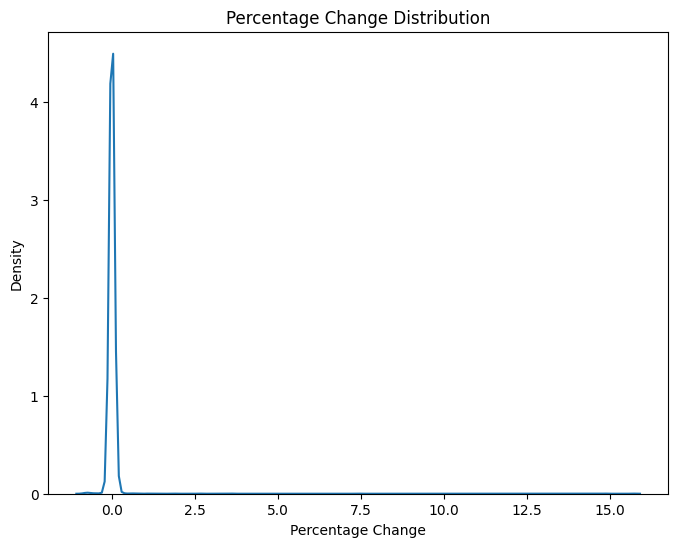

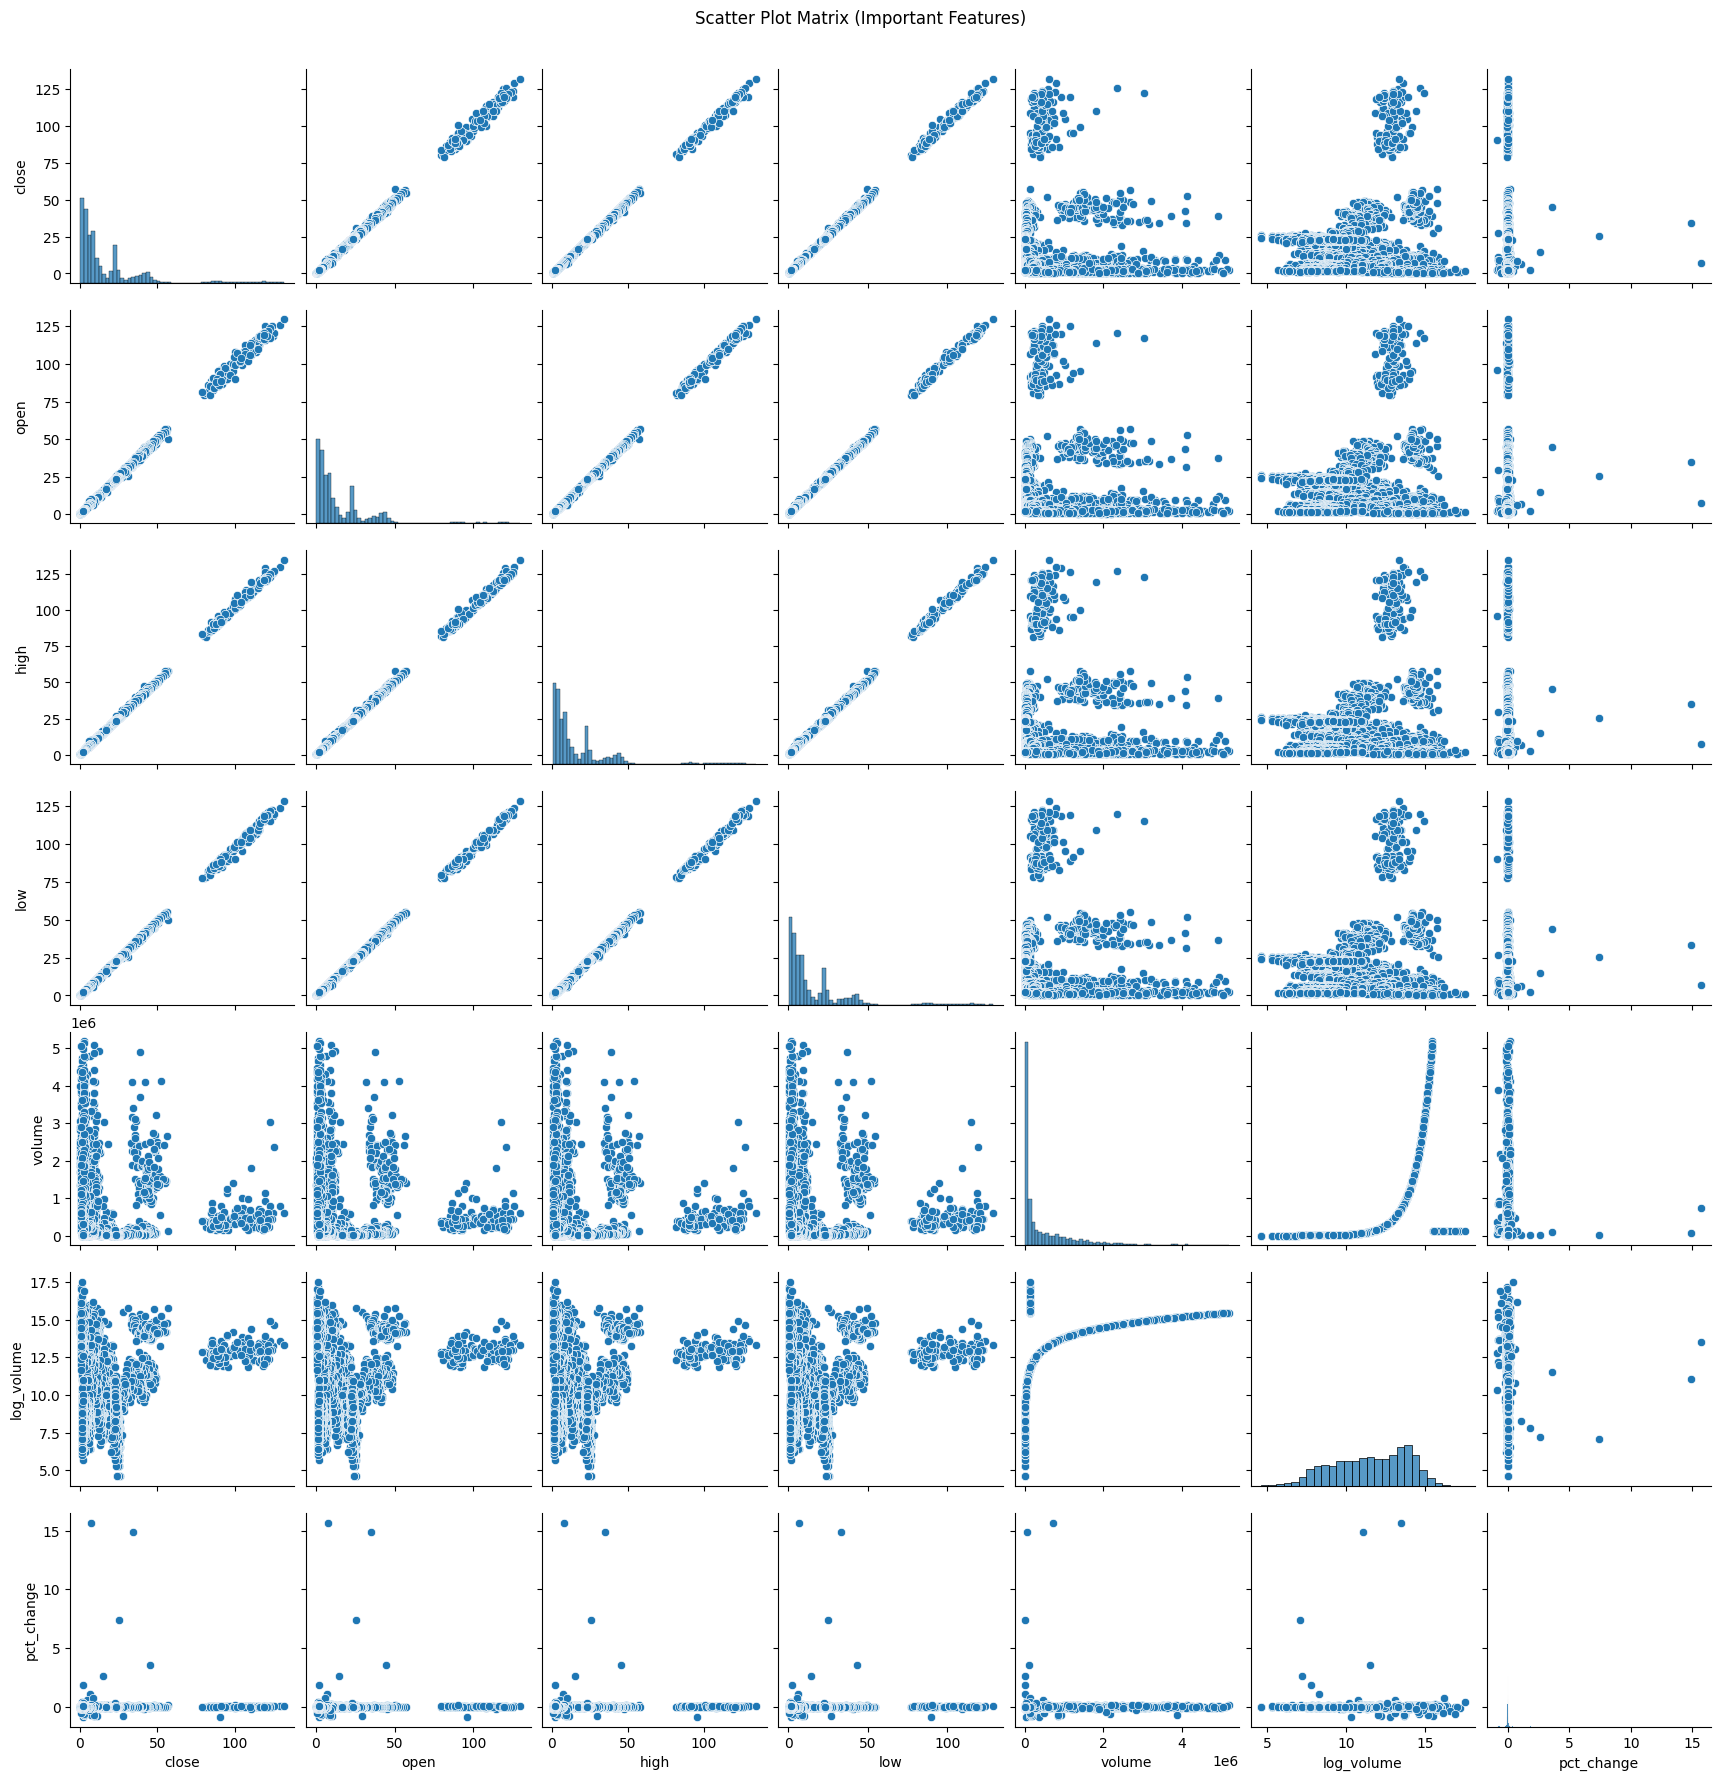

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure date column is parsed as datetime
df['date'] = pd.to_datetime(df['date'])

# Line plot for stock price trend
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.lineplot(data=df, x='date', y='close', label='Close Price')
plt.title('Stock Price Trend')
plt.xlabel('Date')
plt.ylabel('Price')

# Histogram for volume distribution
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='volume', kde=True)
plt.title('Volume Distribution')
plt.xlabel('Volume')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

# Identify outliers and anomalies using boxplot
data = df[['open', 'high', 'low', 'close']]
plt.figure(figsize=(8, 6))
sns.boxplot(data=data)
plt.title('Outlier Detection')
plt.show()

# Correlation matrix
important_cols = ['close', 'open', 'high', 'low', 'volume', 'log_volume', 'pct_change']
plt.figure(figsize=(10, 8))
sns.heatmap(df[important_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix (Important Features)')
plt.show()

# Scatter plot for volume vs. close price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='volume', y='close', data=df)
plt.title('Volume vs. Close Price')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.show()

# Additional KDE plot for percentage change distribution
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='pct_change')
plt.title('Percentage Change Distribution')
plt.xlabel('Percentage Change')
plt.ylabel('Density')
plt.show()

# Scatter plot matrix for selected features
sns.pairplot(df[important_cols])
plt.suptitle('Scatter Plot Matrix (Important Features)', y=1.02)
plt.show()


Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.146e+02, tolerance: 1.459e+02
  model = cd_fast.enet_coordinate_descent(



Lasso (with hyperparameter tuning):
Best Parameters: {'alpha': 0.1}
Mean Squared Error: 0.16
Mean Absolute Error: 0.23
R-squared: 1.00

Decision Tree:
Mean Squared Error: 0.10
Mean Absolute Error: 0.12
R-squared: 1.00
Fitting 3 folds for each of 4 candidates, totalling 12 fits

Random Forest (with hyperparameter tuning):
Best Parameters: {'max_depth': None, 'n_estimators': 200}
Mean Squared Error: 0.04
Mean Absolute Error: 0.08
R-squared: 1.00
Fitting 3 folds for each of 2 candidates, totalling 6 fits

Support Vector (with hyperparameter tuning):
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Mean Squared Error: 61.24
Mean Absolute Error: 3.35
R-squared: 0.86


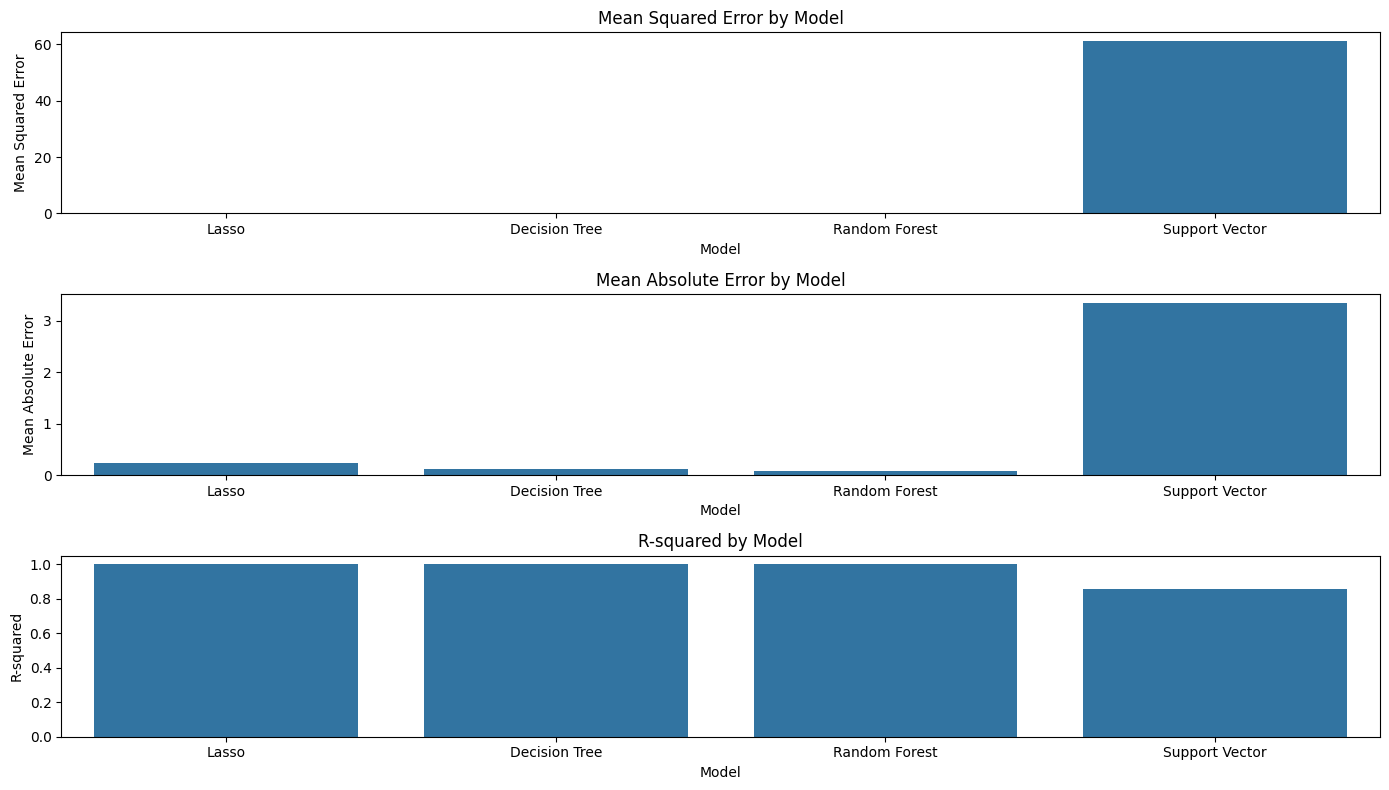

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming 'df' is your DataFrame and 'close' is the target variable
# Drop 'date' if it exists and is not a feature
X = df.drop(columns=['close', 'date'])
y = df['close']

# Handle extreme values in numerical features
for col in X.select_dtypes(include=[np.number]).columns:
    X[col] = X[col].replace([np.inf, -np.inf], np.nan)
    X[col] = X[col].fillna(X[col].median())

# Select only numeric columns for scaling
numeric_cols = X.select_dtypes(include=[np.number]).columns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale/normalize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])

# Replace the scaled columns in the original DataFrame
X_train.loc[:, numeric_cols] = X_train_scaled
X_test.loc[:, numeric_cols] = X_test_scaled

# Define models and their hyperparameters
models = {
    'Lasso': (Lasso(), {'alpha': [0.1, 1.0, 10.0]}),
    'Decision Tree': (DecisionTreeRegressor(random_state=42), {}),
    'Random Forest': (RandomForestRegressor(random_state=42), {'n_estimators': [100, 200], 'max_depth': [None, 10]}),
    'Support Vector': (SVR(), {'kernel': ['rbf'], 'C': [0.1, 1], 'gamma': ['scale']})
}

# Function to evaluate model
def evaluate_model(name, model, params, X_train, y_train, X_test, y_test):
    if params:
        grid_search = GridSearchCV(model, params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        print(f"\n{name} (with hyperparameter tuning):")
        print(f"Best Parameters: {grid_search.best_params_}")
    else:
        best_model = model
        best_model.fit(X_train, y_train)
        print(f"\n{name}:")

    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R-squared: {r2:.2f}")

    return {'name': name, 'mse': mse, 'mae': mae, 'r2': r2}

# Evaluate all models and collect results
results = []
for name, (model, params) in models.items():
    result = evaluate_model(name, model, params, X_train[numeric_cols], y_train, X_test[numeric_cols], y_test)
    results.append(result)

# Convert results to DataFrame for easy visualization
results_df = pd.DataFrame(results)

# Visualize the performance metrics
plt.figure(figsize=(14, 8))

# MSE
plt.subplot(3, 1, 1)
sns.barplot(x='name', y='mse', data=results_df)
plt.title('Mean Squared Error by Model')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')

# MAE
plt.subplot(3, 1, 2)
sns.barplot(x='name', y='mae', data=results_df)
plt.title('Mean Absolute Error by Model')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error')

# R-squared
plt.subplot(3, 1, 3)
sns.barplot(x='name', y='r2', data=results_df)
plt.title('R-squared by Model')
plt.xlabel('Model')
plt.ylabel('R-squared')

plt.tight_layout()
plt.show()


In [ ]:
best_model = min(results, key=lambda x: x['mse'])
print(f"\nBest Model: {best_model['name']}")
print(f"Mean Squared Error: {best_model['mse']:.2f}")
print(f"Mean Absolute Error: {best_model['mae']:.2f}")
print(f"R-squared: {best_model['r2']:.2f}")


Best Model: Random Forest
Mean Squared Error: 0.04
Mean Absolute Error: 0.08
R-squared: 1.00
